In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

### 2.1 Pre-Processing

This [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset is from the UCI ML repository. In this section, we will be preparing the data for regression model construction.

In [2]:
# Read csv file
wine_df = pd.read_csv("https://raw.githubusercontent.com/ysasalas/CS-4372-Assignments/main/winequality-red.csv", sep=";")

In [3]:
# Dataset head
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check for null values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The following features are included in this dataset:
- fixed acidity (float): the amount of acids involved with wine
- volatile acidity (float): the amount of acetic acid in wine (high levels create an unpleasant, vinegar taste)
- citric acid (float): the amount of citric acid in wine (adds "freshness" and flavor)
- residual sugar (float): the amount of sugar remaining after fermentation
- chlorides (float): the amount of salt in wine
- free sulfur dioxide (float): the amount of free form SO<sub>2</sub> in equilibrium between molecular SO<sub>2</sub> and bisulfite ion (prevents microbial growth and oxidation)
- total sulfer dioxide (float): the amount of free and bound forms of SO<sub>2</sub>
- density (float): the density of water in wine
- pH (float): describes how acidic or basic wine is
- sulphates (float): the amount of wine additive that contributes to SO<sub>2</sub> levels
- alcohol (float): the percent alcohol content of wine

We will use these features to predict the quality (integer) of the wine. This is will be scored on a scale from 0 (low) to 10 (high).

Based on the output summary below, we see that our dataset is not normally distributed. This may be 

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
scaler = StandardScaler()
y = wine_df["quality"]
X = wine_df.drop("quality", axis=1)
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,3.836136e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


<AxesSubplot:>

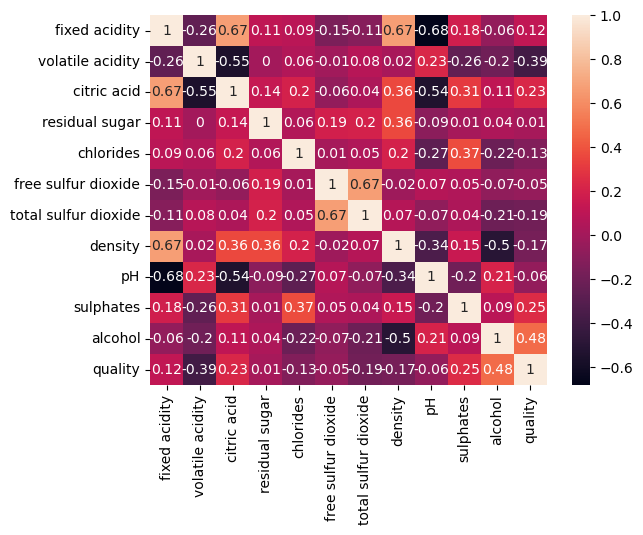

In [8]:
corr_matrix = wine_df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

In [ ]:
sns.pairplot(data=wine_df)